In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
import timeit

def complexidade_temporal(bubble_sort):
  tempo_inicial = time.perf_counter()
  tempo_final = time.perf_counter()
  total = tempo_final - tempo_inicial
  print("Tempo de ordenamento: ", total, "segundos")

**MÉTODOS DE ORDENAÇÃO** => algoritmos que visam organizar dados seguindo um critério específico na menor quantidade de tempo possível

**PARAMÊTROS:**
*   **Número de trocar e inversões** => quantas vezes os elementos trocam de posição?
*   **Número de comparações** => quantas vezes se verifica se um elemento é menor ou maior que outro?
*   **Recursão** => usa ou não?
*   **Estabilidade** => caso um elemento possua o mesmo valor que outro, o algoritmo devolve eles na ordem que eles são encontrados na sequência inicial?
*   **Espaço extra** => além da entrada, quanto espaço esse algoritmo requer?









**BUBBLE SORT** => *bolhas maiores sobem mais rápido*
*   Ordena elementos em ordem **crescente**
*   Compara elementos adjacentes (lado a lado)
*   Se o **primeiro** elemento for **maior que** o **segundo**, o primeiro **assume a posição** do segundo e vice-versa
*   O **maior elemento** é sempre usado para **comparar**


criar funcao para mudar o tamanho da lista e comparar com a funcao que guarda o tempo

Tempo de ordenamento:  7.979999736562604e-07 segundos


Text(0.5, 1.0, 'Bubble Sort')

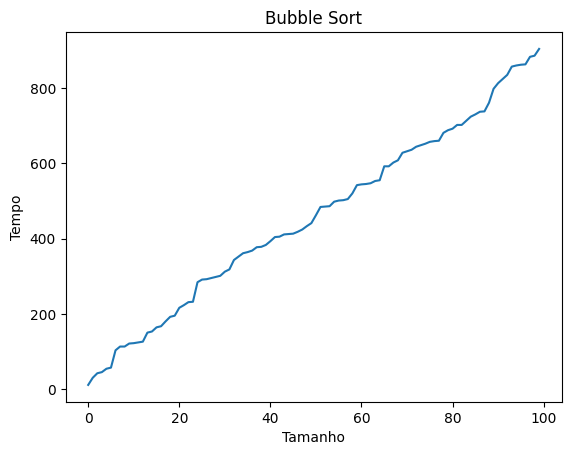

In [ ]:
lista = np.random.randint(0, 1000, size=100)
def bubble_sort(lista):
  for i in range(len(lista)):
      for j in range(0, len(lista)-i-1):
          if lista[j] > lista[j+1]:
              aux = lista[j]
              lista[j] = lista[j + 1]
              lista[j + 1] = aux

complexidade_temporal(bubble_sort)
bubble_sort(lista)

plt.plot(lista)
plt.ylabel("Tempo")
plt.xlabel("Tamanho")
plt.title("Bubble Sort")

### **INSERTION SORT** => *jogo de cartas*
*  Compara os **2 primeiros** elementos
*  Se o **próximo** for **maior**, ele **troca** de **posição** com o **anterior**
*  Se **não** houverem mais **elementos anteriores** para **comparar**, ele **prossegue**
*  Caso haja uma **troca**, o **menor elemento** é **comparado** com os **anteriores**
*  Mesmo que hajam trocas, as **comparações** com os **elementos anteriores** só **termina** quando **não houverem mais elementos antes**

Tempo de ordenamento:  6.440000106522348e-07 segundos


Text(0.5, 1.0, 'Insertion Sort')

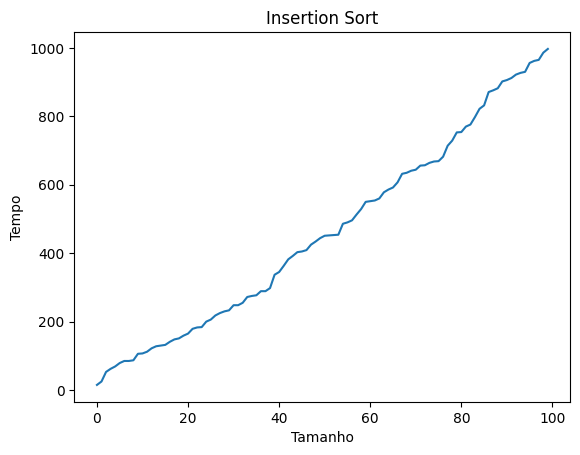

In [ ]:
lista = np.random.randint(0, 1000, size=100)
def insertion_sort(lista):
  for i in range(len(lista)):
      aux = lista[i]
      j = i - 1
      while j >= 0 and lista[j] > aux:
            lista[j + 1] = lista[j]
            j = j - 1
      lista[j + 1] = aux

complexidade_temporal(insertion_sort)
insertion_sort(lista)

plt.plot(lista)
plt.ylabel("Tempo")
plt.xlabel("Tamanho")
plt.title("Insertion Sort")

### **SELECTION SORT** => *troca nos extremos*
*   O primeiro item é chamado de ***mínimo***
*   O item ***mínimo*** é comparado com o segundo item => se o segundo item for menor, ele deverá ser o novo ***mínimo***
*   A cada iteração, o ***mínimo*** é posto na posição final da lista de números não ordenados
*   Repita esse processo até o item final, atribuindo um novo ***mínimo*** sempre que necessário


Tempo de ordenamento:  4.55000190413557e-07 segundos


Text(0.5, 1.0, 'Selection Sort')

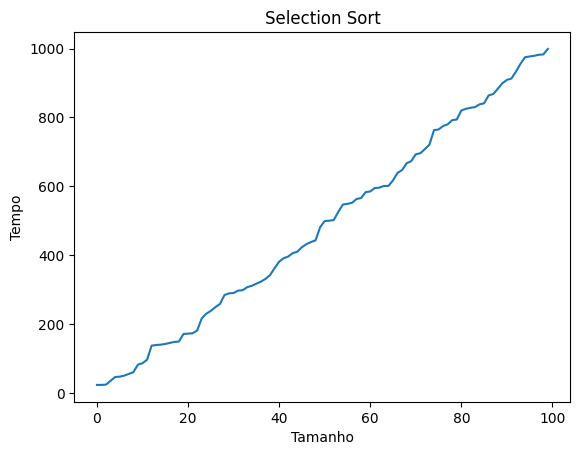

In [ ]:
lista = np.random.randint(0, 1000, size=100)
def selection_sort(lista):
  for i in range(len(lista) - 1):
      minimo = i
      for j in range (i + 1, len(lista)):
          if lista[j] < lista[minimo]:
            minimo = j
      aux = lista[i]
      lista[i] = lista[minimo]
      lista[minimo] = aux

complexidade_temporal(selection_sort)
selection_sort(lista)

plt.plot(lista)
plt.ylabel("Tempo")
plt.xlabel("Tamanho")
plt.title("Selection Sort")

### **QUICK SORT** => *dividir a* ***sequência de números*** *e conquistar a* ***solução***

*   Um elemento da lista é escolhido como **pivô**
*   Os elementos **menores** que o **pivô** ficam à **esquerda** e os elementos **maiores** que o **pivô** ficam à **direita**
*   É comum se referir à essa divisão feita pela escolha do pivô como **partições** -> essas partições se formam a partir de comparações que se dão de maneira recursiva
*   O algoritmo faz constantemente **comparações** entre o **elemento esquerdo com o elemento direito**

**OBSERVAÇÕES**

1.  O quick sort se baseia na técnica de **divisão e conquista** => ele é uma das formas de construir **algoritmos eficientes**
2.  A escolha do pivô pode afetar a **complexidade temporal** do algoritmo, até mesmo em listas pequenas.
3.  A maneira mais segura de escolher um pivô é selecionar o elemento do meio do array
4. O quick sort usa recursão

Tempo de ordenamento:  5.349997991288546e-07 segundos


Text(0.5, 1.0, 'Quick Sort')

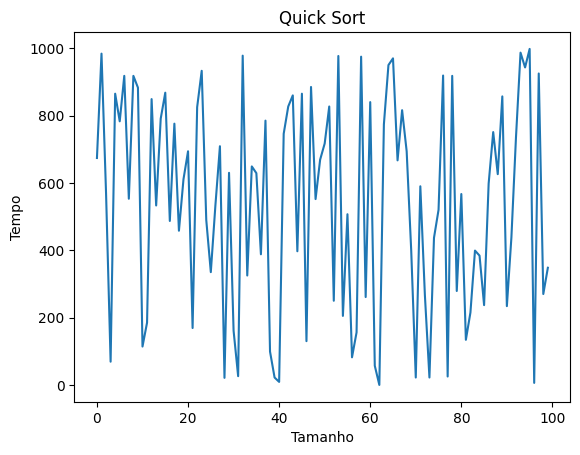

In [ ]:
#CRÉDITOS AO PROFESSOR RONALDO QUE ME AJUDOU A IMPLEMENTAR ESSE MÉTODO <3
lista = np.random.randint(0, 1000, size=100)

def quick_sort(lista):
    particaoDireita = []
    particaoEsquerda = []
    particaoMeio = []

    if len(lista) <= 1:
       return lista

    pivo = lista[int(len(lista)/2)]

    for i in lista:
        if i < pivo:
           particaoEsquerda.append(i)
        if i > pivo:
           particaoDireita.append(i)
        if i == pivo:
           particaoMeio.append(i)

    return quick_sort(particaoEsquerda) + particaoMeio + quick_sort(particaoDireita)

complexidade_temporal(quick_sort)
quick_sort(lista)

plt.plot(lista)
plt.ylabel("Tempo")
plt.xlabel("Tamanho")
plt.title("Quick Sort")

### **SHELL SORT** => *insertion sort, só que melhor*

* Um número N que corresponde ao número de elementos na lista é sucessivamente dividido por 2^k.  
* A cada loop, o valor de K é incrementado ou decrementado conforme a necessidade.
* Importante ressaltar que, quando isso ocorre, a distância entre os elementos fica menor.
* Quando ⌊N/2^k⌋ = 1, a ordenação chega ao fim.

In [ ]:
lista = np.random.randint(0, 1000, size=100)
def shell_sort(lista):
    espaco = len(lista)//2
    while espaco > 0:
        j = espaco
        while j < len(lista):
            i = j - espaco
            while i >= 0:
               if lista[i+espaco]>lista[i]:
                    break
               else:
                    lista[i+espaco],lista[i]=lista[i],lista[i+espaco]

               i = i - espaco
            j += 1
        espaco = espaco//2
    return lista

shell_sort(lista)


array([  1,   8,  11,  17,  19,  30,  42,  43,  79,  89,  99, 101, 105,
       154, 184, 199, 257, 263, 267, 271, 283, 301, 307, 312, 314, 314,
       320, 328, 344, 351, 375, 378, 404, 412, 419, 423, 424, 449, 454,
       458, 460, 474, 476, 480, 480, 489, 491, 492, 520, 523, 536, 551,
       565, 575, 590, 594, 603, 616, 618, 630, 634, 635, 645, 651, 654,
       694, 701, 712, 731, 755, 755, 763, 776, 788, 790, 806, 817, 826,
       827, 833, 836, 836, 853, 868, 873, 874, 881, 882, 904, 920, 926,
       931, 932, 932, 959, 960, 964, 972, 981, 988])

**CURIOSIDADES**
*   O tamanho da lista não afeta a complexidade temporal, mas a escolha do pivô sim
*   Experimente trocar o pivô pelos elementos do extremo da lista, isto é, o primeiro ou o último elemento



### **MERGE SORT** => *dividir, conquistar e* ***combinar***

* Outro método de ordenação que usa **divisão e conquista**
* A lista de elementos é dividida ao **meio** em **sublistas** e assim por diante **até cada elemento ficar isolado**
* Terminadas as divisões, os elementos são **comparados** de **dois em dois** e **ordenados** numa **sublista**
* Os **elementos das sublistas** formadas por esse processo vão sendo **comparados** e **ordenados** até **formar a lista final**, com todos os **elementos originais ordenados**

Tempo de ordenamento:  9.529999260848854e-07 segundos


Text(0.5, 1.0, 'Merge Sort')

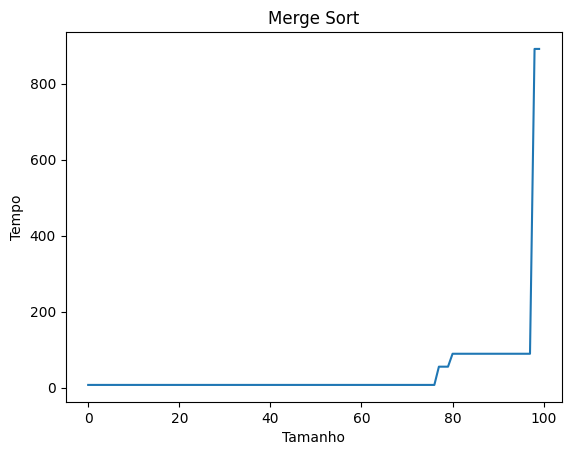

In [ ]:
#USAREMOS NOVAMENTE A IDEIA DE PARTIÇÕES DO MÉTODO ANTERIOR
lista = np.random.randint(0, 1000, size=100)

def merge_sort(lista):

    if len(lista) <= 1:
       return lista

    #operador // realiza uma divisao inteira
    particaoMeio = len(lista)//2
    #elementos antes de particaoMeio - 1
    particaoEsquerda = lista[:particaoMeio]
    #elementos depois de particaoMeio - 1
    particaoDireita = lista[particaoMeio:]

    merge_sort(particaoDireita)
    merge_sort(particaoEsquerda)
    i = j = k = 0

    #combina particaoDireita e particaoEsquerda juntando-as na lista original
    while i < len(particaoEsquerda) and j < len(particaoDireita):
          #condição que compara e ordena os elementos menores
          if particaoEsquerda[i] <= particaoDireita[j]:
             lista[k] = particaoEsquerda[i]
             i += 1
          #condição que compara e ordena os elementos maiores
          else:
             lista[k] = particaoDireita[j]
             j += 1
          k += 1

    #verifica se há elementos restantes em particaoEsquerda
    while i < len(particaoEsquerda):
          lista[k] = particaoEsquerda[i]
          i += 1
          k += 1

    #verifica se há elementos restantes em particaoDireita
    while j < len(particaoDireita):
          lista[k] = particaoDireita[j]
          j += 1
          k += 1

    return lista

complexidade_temporal(merge_sort)
merge_sort(lista)

plt.plot(lista)
plt.ylabel("Tempo")
plt.xlabel("Tamanho")
plt.title("Merge Sort")

### **COUNTING SORT** => *não usa comparações*

* São dadas **3 listas**: uma com os **elementos a serem ordenados**, outra que conta de **0 até o maior número na lista de entrada** na lista desordenada e repleta de **zeros** na mesma **quantidade de elementos** a serem ordenados

In [ ]:
lista = np.random.randint(0, 1000, size=100)
def counting_sort(lista):
    lista_contagem = np.arange(0, np.max(lista))
    lista_zeros = np.zeros(len(lista))
    i = 0

    for i in range(len(lista)):
        print("")

counting_sort(lista)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


**HEAP SORT**

**COUNTING SORT**

**BUCKET SORT**

**RADIX SORT**